> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No Show Appointments Data Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

## Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


## Question(s) for Analysis
### 1- What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
### 2- Which day are the most appointment made?
### 3- How was the attendance rate for each day?

In [3]:
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install pandas --upgrade --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached pandas-1.3.3-cp37-cp37m-win_amd64.whl (10.0 MB)
  Using cached numpy-1.21.2-cp37-cp37m-win_amd64.whl (14.0 MB)


In [ ]:
!pip install numpy --upgrade --user
print(np.__version__)
print(np.__version__)
print(pd.__version__)

     |████████████████████████████████| 15.7 MB 175 kB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


1.19.5
1.19.5
1.1.5


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')

In [9]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.shape

(110527, 14)

In [10]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [12]:
# Drop those columns that are not important for the analysis
df.drop(['PatientId', 'AppointmentID', ], axis=1, inplace=True)

In [13]:
# Rename the column name
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [14]:
# To make sure the no_show column consists only 'Yes' and 'No'
df['no_show'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# Checking the range of age
df['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [16]:
# Drop the age rows that less than 0 and greater than 99
df.drop(df[(df.age < 0) | (df.age > 99)].index, inplace=True)

In [17]:
df['age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99])

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


## Exploratory Data Overview:
### Explore the no_show data with pie chart and bar chart
### Plot histogram for all variables against no_show
### Plot scatter for each of variable against no_show
### Plot pie chart for each of variable against no_show

In [18]:
# Check the total amount of present
Show = (df.no_show == 'No').sum()
Show

88199

In [19]:
# Check the total amount of absent
noShow = (df.no_show == 'Yes').sum()
noShow

22316

### Explore the no_show data with pie chart and bar chart

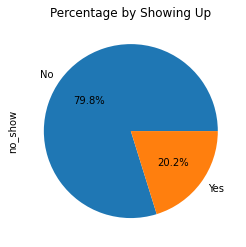

In [20]:
# Plot the Pie chart for the present and absent
df['no_show'].value_counts().plot(kind='pie', title = 'Percentage by Showing Up', autopct='%1.1f%%');

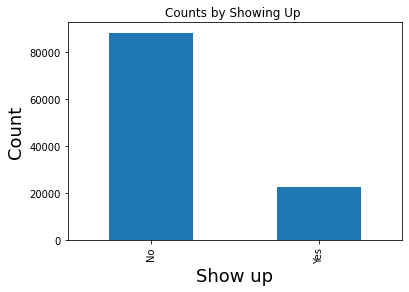

In [21]:
# Plot the bar chart for the present and absent
df['no_show'].value_counts().plot(kind='bar', title = 'Counts by Showing Up ')
plt.xlabel('Show up', fontsize=18)
plt.ylabel('Count', fontsize=18);

### Plot histogram for all variables against no_show

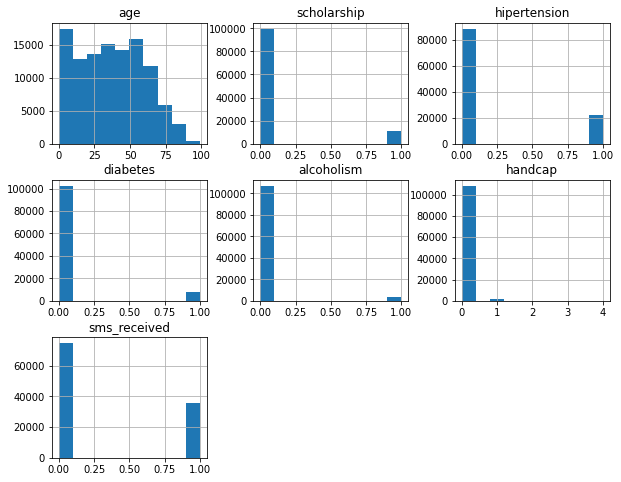

In [22]:
df.hist(figsize =(10, 8));

### Plot Bar for each of variable against no_show

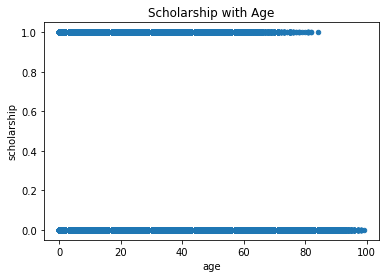

In [23]:
# scatter plot for variable 'scholarship' with age
df.plot.scatter(x='age', y='scholarship',title='Scholarship with Age');


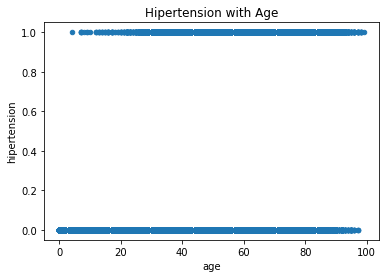

In [24]:
# scatter plot for variable 'hipertension' with age
df.plot.scatter(x='age', y='hipertension', title='Hipertension with Age');

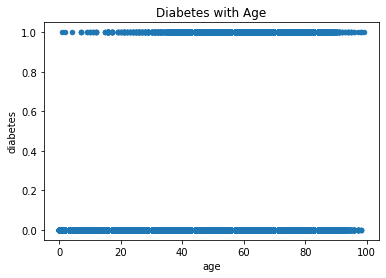

In [25]:
# scatter plot for variable 'diabetes' with age
df.plot.scatter(x='age', y='diabetes',title='Diabetes with Age');

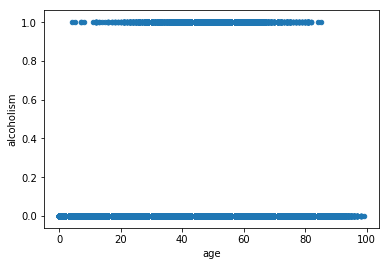

In [ ]:
# scatter plot for variable 'alcoholism' with age
df.plot.scatter(x='age', y='alcoholism',title='Alcoholism with Age');

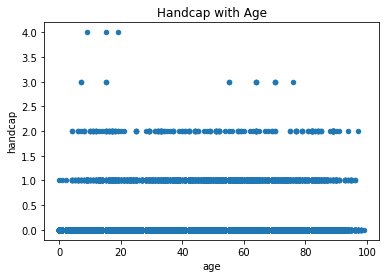

In [26]:
# scatter plot for variable 'handcap' with age
df.plot.scatter(x='age', y='handcap',title='Handcap with Age');

## Plot bar chart and pie chart for each of variable against no_show

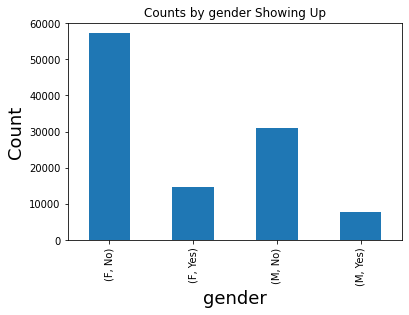

In [27]:
# Bar chart for variable 'gender' with no_show
df.groupby(['gender', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by gender Showing Up')
plt.xlabel('gender', fontsize=18)
plt.ylabel('Count', fontsize=18);

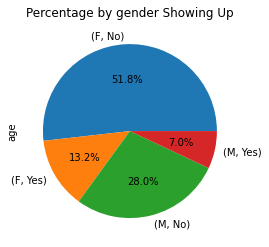

In [28]:
# Pie chart for variable 'gender' with no_show
df.groupby(['gender', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by gender Showing Up', autopct='%1.1f%%');

# Research Question 1:
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

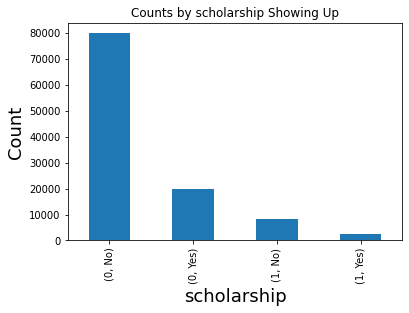

In [29]:
# Bar chart for variable 'scholarship' with no_show
df.groupby(['scholarship', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by scholarship Showing Up')
plt.xlabel('scholarship', fontsize=18)
plt.ylabel('Count', fontsize=18);

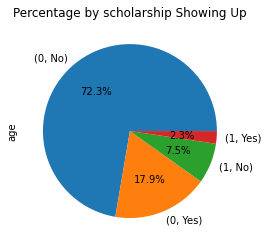

In [31]:
# Pie chart for variable 'scholarship' with no_show
df.groupby(['scholarship', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by scholarship Showing Up', autopct='%1.1f%%');

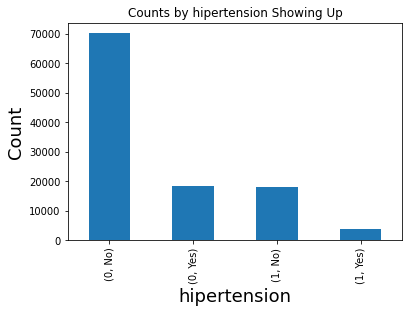

In [32]:
# Bar chart for variable 'hipertension' with no_show
df.groupby(['hipertension', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by hipertension Showing Up')
plt.xlabel('hipertension', fontsize=18)
plt.ylabel('Count', fontsize=18);

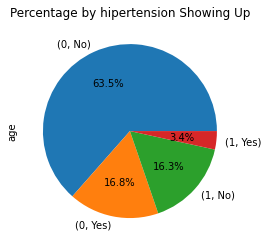

In [33]:
# Pie chart for variable 'hipertension' with no_show
df.groupby(['hipertension', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by hipertension Showing Up', autopct='%1.1f%%');

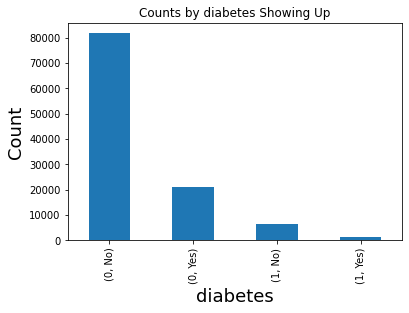

In [34]:
# Bar chart for variable 'diabetes' with no_show
df.groupby(['diabetes', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by diabetes Showing Up')
plt.xlabel('diabetes', fontsize=18)
plt.ylabel('Count', fontsize=18);

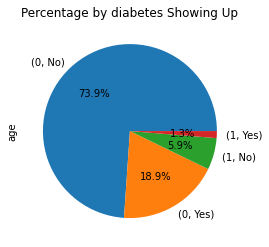

In [35]:
# Pie chart for variable 'diabetes' with no_show
df.groupby(['diabetes', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by diabetes Showing Up', autopct='%1.1f%%');

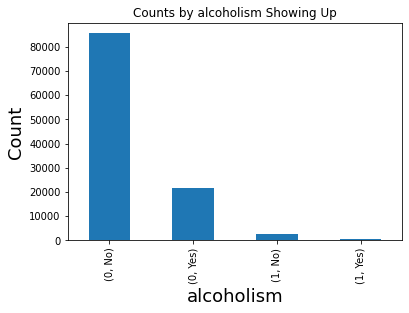

In [36]:
# Bar chart for variable 'alcoholism' with no_show
df.groupby(['alcoholism', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by alcoholism Showing Up')
plt.xlabel('alcoholism', fontsize=18)
plt.ylabel('Count', fontsize=18);

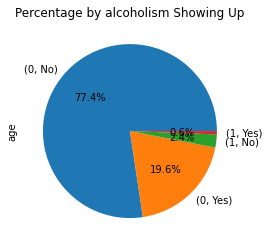

In [37]:
# Pie chart for variable 'alcoholism' with no_show
df.groupby(['alcoholism', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by alcoholism Showing Up', autopct='%1.1f%%');

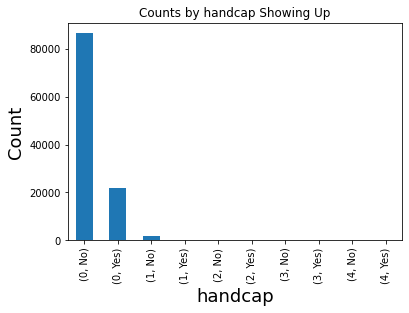

In [38]:
# Bar chart for variable 'handcap' with no_show
df.groupby(['handcap', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by handcap Showing Up')
plt.xlabel('handcap', fontsize=18)
plt.ylabel('Count', fontsize=18);

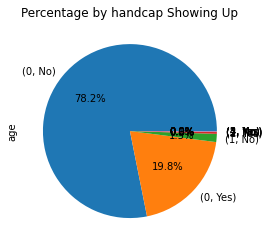

In [39]:
# Pie chart for variable 'handcap' with no_show
df.groupby(['handcap', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by handcap Showing Up', autopct='%1.1f%%');

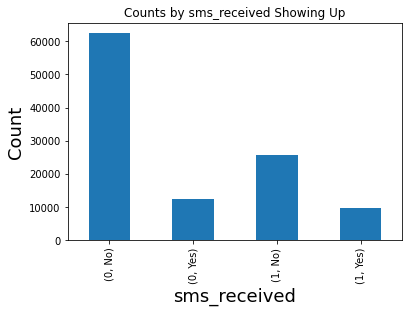

In [40]:
# Bar chart for variable 'sms_received' with no_show
df.groupby(['sms_received', 'no_show']).count()['age'].plot(kind='bar', title = 'Counts by sms_received Showing Up')
plt.xlabel('sms_received', fontsize=18)
plt.ylabel('Count', fontsize=18);

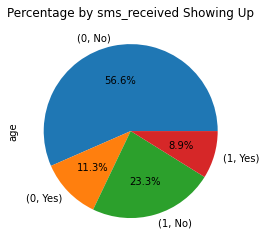

In [41]:
# Pie chart for variable 'sms_received' with no_show
df.groupby(['sms_received', 'no_show']).count()['age'].plot(kind='pie', title = 'Percentage by sms_received Showing Up', autopct='%1.1f%%');

# Result:
### For the variable that give highest attendance rate are variable with zero handcap consists of 78.2%.
### Follow by alcoholism variable with 77.4% attendance rate that are not alcoholism.
### This two are the significant factors to predict if a patient will show up for their scheduled appointment

# Research Question 2:
## Which day are the most appointment made?
## How was the attendance rate for each day?

In [42]:
# Change the appointmentday data type from object to datetime
df['appointmentday'] = pd.to_datetime(df['appointmentday'])

In [43]:
# Create new column name 'weekday' from 0 to 6 where 0 is Monday 6 is Sunday
df['weekday']=df['appointmentday'].dt.dayofweek
df['weekday'].nunique()

6

In [44]:
# Observe the total count of appointment made by day
df_day = df.groupby(['weekday']).count()['age']
df_day

weekday
0    22712
1    25637
2    25866
3    17244
4    19017
5       39
Name: age, dtype: int64

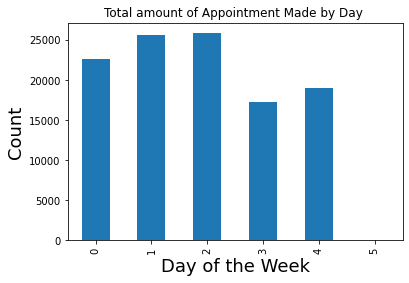

In [45]:
# Observe the total amount of appointment made by day in bar chart
df_day.plot(kind='bar', title = 'Total amount of Appointment Made by Day ')
plt.xlabel('Day of the Week', fontsize=18)
plt.ylabel('Count', fontsize=18);

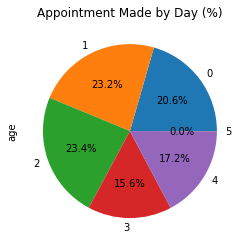

In [46]:
# Observe the total amount of appointment made by day in pie chart
df_day.plot(kind='pie', title = 'Appointment Made by Day (%)', autopct='%1.1f%%');


# Result:
## Wednesday was the day with highest total amount of appointment made which is 25867 (23%). Then followed by Tuesday with 25640 (23.2%). The lowest total amount of appointment made is Saturday with 39 and no record found in Sunday probably an off day.

<a id='conclusions'></a>
# Conclusions
#### For the variable that give highest attendance rate are variable with zero handcap consists of 78.2%.
#### Follow by alcoholism variable with 77.4% attendance rate that are not alcoholism.
#### This two are the significant factors to predict if a patient will show up for their scheduled appointment.
#### Wednesday was the day with highest total amount of appointment made which is 25867 (23%).
#### Then followed by Tuesday with 25640 (23.2%).
#### The lowest total amount of appointment made is Saturday with 39. 
#### No record found in Sunday probably an off day.
# Limitations
#### For the first research question handcap and alcoholism are the significant factors to predict if a patient will show up for their scheduled appointment.
#### Second research question Wednesday was the most popular day for people to attend their appointment.
#### In the exploratory data section 
#### I think scatter plot not suitable for categorical data
#### so most of the time I had to use bar chart and pie chart to describe the data.
## Submitting your Project 


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255